In [1]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df=pd.read_excel(r'C:\Users\shaik mahaboob basha\Downloads\Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 545.3+ KB


In [5]:
df.shape

(12690, 9)

In [7]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [8]:
df.duplicated().sum()

25

In [9]:
#Droping The Duplicates
df= df.drop_duplicates()

In [40]:
print('Title :',df['TITLE'].nunique())
print('Resturant :',df['RESTAURANT_ID'].nunique())
print('Cuisines :',df['CUISINES'].nunique())
print('Time :' ,df['TIME'].nunique())
print('City : ',df['CITY'].nunique())
print('Locality :',df['LOCALITY'].nunique())
print('Rating :',df['RATING'].nunique())
print('Votes :',df['VOTES'].nunique())

Title : 113
Resturant : 11892
Cuisines : 4155
Time : 2689
City :  359
Locality : 1416
Rating : 32
Votes : 1847


Univariant Ananlysis

<ipython-input-43-a12efcdd9901>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


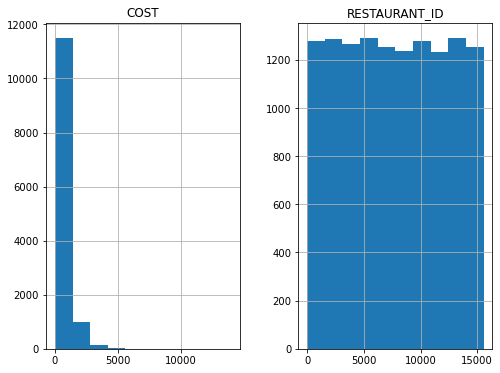

In [43]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
df.hist(ax = ax)

import warnings
warnings.filterwarnings('ignore')

Bi Variant Ananlysis

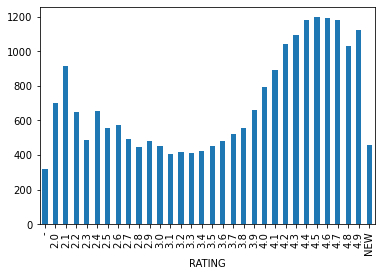

In [41]:
df.groupby(['RATING'])['COST'].mean().plot(kind='bar')

Most Frequent Rating is 4.5, 4.6, 4.4

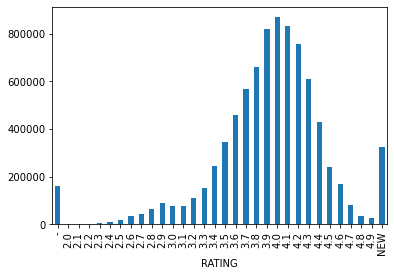

In [42]:
df.groupby(['RATING'])['COST'].sum().plot(kind='bar')

4.0 Has More higher alonge with the cost

In [10]:
#Checking The Null Values
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

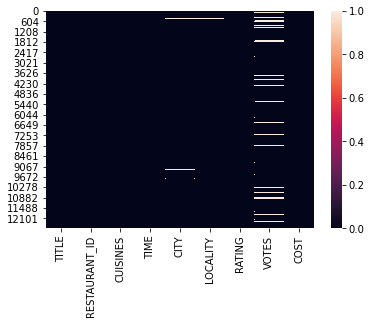

In [13]:
#Graphical Representation of Null Values in Heatmap
sb.heatmap(df.isnull())

In [36]:
df.replace(" ",np.nan,inplace=True)


In [37]:


#Treating The Null Values
df['CITY'].fillna(df['CITY'].mode(),inplace=True)
df['LOCALITY'].fillna(df['LOCALITY'].mode(),inplace=True)
df['VOTES'].fillna(df['VOTES'].mode(),inplace=True)
df['RATING'].fillna(df['RATING'].mode(),inplace=True)



In [38]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [11]:
df.select_dtypes(include=['object']).columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'], dtype='object')

In [12]:
df.select_dtypes(include=['int64']).columns

Index(['RESTAURANT_ID', 'COST'], dtype='object')

In [47]:
new1_test = df["VOTES"].str.split(" ", n = 1, expand =True)

In [49]:

df['votes_no'] = new1_test[0]
df['votes'] = new1_test[1]

df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,165,votes
...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,546,votes
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1214,votes
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,608,votes
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,32,votes


In [51]:
df['votes_no'] = df['votes_no'].astype(float)

Fill The Missing Values

In [52]:
df['votes_no'] = df['votes_no'].fillna(44.0) # filling with mode
df['RATING'] = df['RATING'].fillna(3.8) # filling with the median
df['LOCALITY'] = df['LOCALITY'].fillna('Gachibowli')
df['CITY'] = df['CITY'].fillna('Chennai')

In [55]:
#Droping Values
df = df.drop(['VOTES', 'votes'], axis=1)

KeyError: "['VOTES' 'votes'] not found in axis"

In [56]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,165.0
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,546.0
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,1214.0
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,1300,608.0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32.0


In [57]:
df.drop(['TIME'], axis=1)

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,votes_no
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,1200,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,1500,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,800,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,800,24.0
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,300,165.0
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,500,546.0
12686,"CASUAL DINING,BAR",9686,"Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1800,1214.0
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,1300,608.0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,400,32.0


Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

df_cv = df[['TITLE','CUISINES','CITY','LOCALITY']]

for val in df_cv:
    le=LabelEncoder()
    df[val]=le.fit_transform(df[val].astype(str))

In [63]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no
0,31,9438,2627,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,1200,49.0
1,33,13198,289,6pm – 11pm (Mon-Sun),67,1046,4.2,1500,30.0
2,31,10915,2976,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,800,221.0
3,95,6346,4130,11:30am – 1am (Mon-Sun),222,136,4.1,800,24.0
4,50,15387,1766,11am – 1am (Mon-Sun),222,620,3.8,300,165.0
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,3.8,500,546.0
12686,33,9686,2143,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,4.3,1800,1214.0
12687,71,11133,2088,12noon – 12:30AM (Mon-Sun),239,1342,4.0,1300,608.0
12688,31,6134,3506,6am – 10:45pm (Mon-Sun),67,631,3.5,400,32.0


In [82]:
x = df.drop(['TIME','COST'], axis=1)
x['RATING']=le.fit_transform(df['RATING'].astype(str))
x

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,votes_no
0,31,9438,2627,320,285,17,49.0
1,33,13198,289,67,1046,23,30.0
2,31,10915,2976,67,1101,19,221.0
3,95,6346,4130,222,136,22,24.0
4,50,15387,1766,222,620,19,165.0
...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,19,546.0
12686,33,9686,2143,222,133,24,1214.0
12687,71,11133,2088,239,1342,21,608.0
12688,31,6134,3506,67,631,16,32.0


In [80]:
x.dtypes

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
CITY               int32
LOCALITY           int32
RATING            object
votes_no         float64
dtype: object

In [68]:
y = df.iloc[:,-2]
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12665, dtype: int64

Transforming Skewness

In [84]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.80741929,  0.44210845,  0.36288593, ..., -0.87111928,
        -0.37641915, -0.74378162],
       [-0.73821023,  1.14111502, -1.69900165, ...,  0.98270479,
         0.68763243, -1.11418274],
       [-0.80741929,  0.72516439,  0.63173657, ...,  1.08430508,
        -0.03444202,  0.34887235],
       ...,
       [ 0.41656984,  0.76593925, -0.06447673, ...,  1.50293496,
         0.32049363,  1.03789116],
       [-0.80741929, -0.2457756 ,  1.03033318, ...,  0.11210573,
        -0.54227646, -1.06516734],
       [-0.80741929, -0.18024808,  0.60883971, ...,  1.48799174,
        -0.7045477 ,  1.10888185]])

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-0.80741929,  0.44210845,  0.36288593, ..., -0.87111928,
        -0.37641915, -0.74378162],
       [-0.73821023,  1.14111502, -1.69900165, ...,  0.98270479,
         0.68763243, -1.11418274],
       [-0.80741929,  0.72516439,  0.63173657, ...,  1.08430508,
        -0.03444202,  0.34887235],
       ...,
       [ 0.41656984,  0.76593925, -0.06447673, ...,  1.50293496,
         0.32049363,  1.03789116],
       [-0.80741929, -0.2457756 ,  1.03033318, ...,  0.11210573,
        -0.54227646, -1.06516734],
       [-0.80741929, -0.18024808,  0.60883971, ...,  1.48799174,
        -0.7045477 ,  1.10888185]])

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [86]:
max_scr=0
for i in range(0,6000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)

At Random State 255 . The Model Is Performing Very Well
At Random State:- 255
Training r2_score is 17.882932234567704
Testing r2_score is 17.882800546601672
At Random State 613 . The Model Is Performing Very Well
At Random State:- 613
Training r2_score is 17.87313175221794
Testing r2_score is 17.870993940006684
At Random State 766 . The Model Is Performing Very Well
At Random State:- 766
Training r2_score is 17.864959994284145
Testing r2_score is 17.856474877895
At Random State 880 . The Model Is Performing Very Well
At Random State:- 880
Training r2_score is 17.88225598424289
Testing r2_score is 17.878936117742995
At Random State 2076 . The Model Is Performing Very Well
At Random State:- 2076
Training r2_score is 17.881976865771442
Testing r2_score is 17.875710088101883
At Random State 3857 . The Model Is Performing Very Well
At Random State:- 3857
Training r2_score is 17.881983680412816
Testing r2_score is 17.884512761635783
At Random State 5343 . The Model Is Performing Very Well
At

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=880) #Random state = 880

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Regularisation

Lasso

In [90]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [91]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 17.887020980414626
R2_score is :- 17.8725384028694


At CV :- 3
Cross Validation Score is :- 17.954492322171944
R2_score is :- 17.8725384028694


At CV :- 4
Cross Validation Score is :- 17.88839345954208
R2_score is :- 17.8725384028694


At CV :- 5
Cross Validation Score is :- 17.928940856027022
R2_score is :- 17.8725384028694


At CV :- 6
Cross Validation Score is :- 17.92217417833388
R2_score is :- 17.8725384028694


At CV :- 7
Cross Validation Score is :- 17.942036779040063
R2_score is :- 17.8725384028694


At CV :- 8
Cross Validation Score is :- 17.920207360261404
R2_score is :- 17.8725384028694


At CV :- 9
Cross Validation Score is :- 18.209156658048816
R2_score is :- 17.8725384028694




In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 332.4730186756541
Mean Square Error: 303996.7019914528
Root Mean Sqaured Error: 551.3589592919052


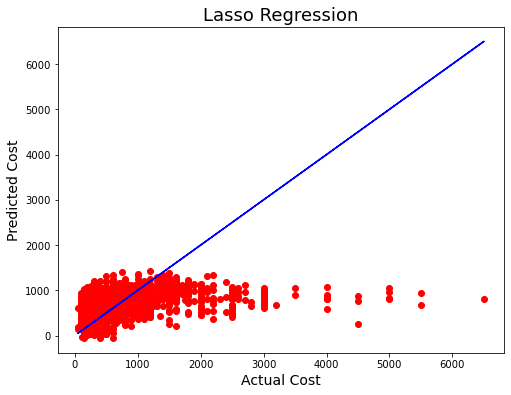

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Cost',fontsize=14)
plt.ylabel('Predicted Cost',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Data Points are far away from the predicted line

Ridge Regression

In [94]:
from sklearn.linear_model import Ridge
parameters ={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'random_state':[1,2,3,4,5,6,7,8,9]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'random_state': 1}


In [95]:
ridge=Ridge(alpha=0.01,random_state=1,fit_intercept=True,normalize= True)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
for j in range(2,10):
    rdscore = cross_val_score(rd,x_t,y,cv=j)
    rdc=rdscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",rdc*100)
    print ("R2_score is :-",rdc*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 17.88312629554377
R2_score is :- 17.88312629554377


At CV :- 3
Cross Validation Score is :- 17.95095705920506
R2_score is :- 17.95095705920506


At CV :- 4
Cross Validation Score is :- 17.881528247947475
R2_score is :- 17.881528247947475


At CV :- 5
Cross Validation Score is :- 17.923720832347414
R2_score is :- 17.923720832347414


At CV :- 6
Cross Validation Score is :- 17.91650178290379
R2_score is :- 17.91650178290379


At CV :- 7
Cross Validation Score is :- 17.93505477150404
R2_score is :- 17.93505477150404


At CV :- 8
Cross Validation Score is :- 17.913976538507235
R2_score is :- 17.913976538507235


At CV :- 9
Cross Validation Score is :- 18.20425394342845
R2_score is :- 18.20425394342845




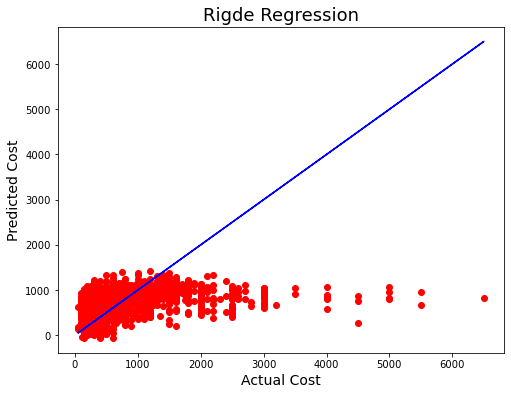

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Cost',fontsize=14)
plt.ylabel('Predicted Cost',fontsize=14)
plt.title('Rigde Regression',fontsize=18)
plt.show()

In [97]:
#Ensemblier Technique
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [98]:
dt=DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: 49.575628384358026
Cross Val Score: 38.11587425552854


In [99]:
print("Error:")
print("Mean Absolute Error:",round(mean_absolute_error(y_test,pred_decision),2))
print("Mean Square Error:",round(mean_squared_error(y_test,pred_decision),2))
print("Root Mean Sqaured Error:",round(np.sqrt(mean_squared_error(y_test,pred_decision)),2))

Error:
Mean Absolute Error: 263.92
Mean Square Error: 186646.98
Root Mean Sqaured Error: 432.03


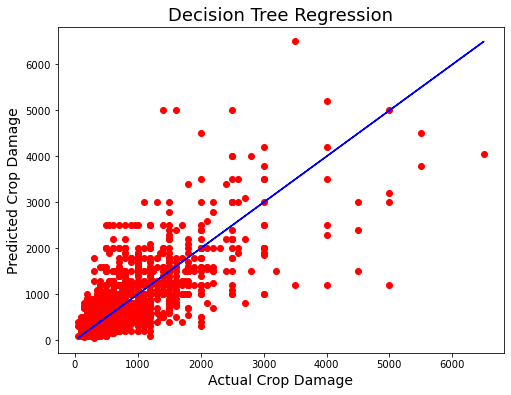

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

49% Accuracy is observed in Decision Tree Model

In [101]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 300}


In [102]:
rf=RandomForestRegressor(criterion='friedman_mse', n_estimators= 300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rd=rf.predict(x_test)
rfs=r2_score(y_test,pred_rd)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2_score: 73.43012476194245
Cross Val Score: 68.85367277316222


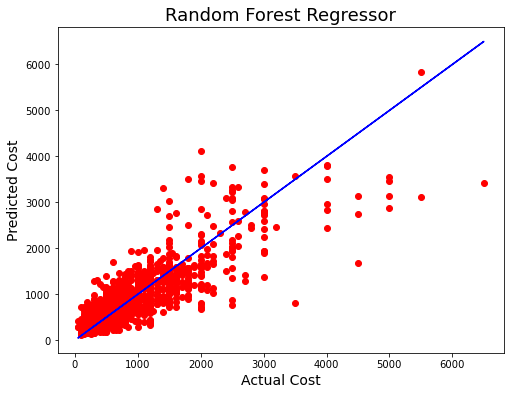

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Cost',fontsize=14)
plt.ylabel('Predicted Cost',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

73.43 % Accurate Score as most of the data point lying on the predicted lines

Gredient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}


In [106]:
gbr=GradientBoostingRegressor(criterion='friedman_mse', loss='ls',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_random)
print("r2_score:",round(gbrs*100,2))
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',round(gbrc*100,2))

r2_score: 71.69
Cross Val Score: 70.67


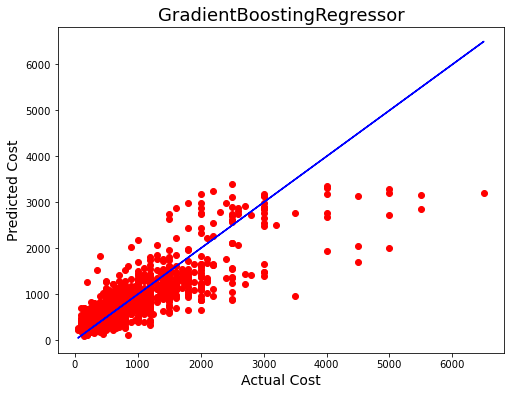

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Cost',fontsize=14)
plt.ylabel('Predicted Cost',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

71.69% Accuracy is been observed and data line are far away from the predicted Line

In [109]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'linear'}


In [111]:
sv=SVR(kernel='linear',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2_score:",round(svs*100,2))
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',round(svc*100,2))


r2_score: 10.24
Cross Val Score: 10.69


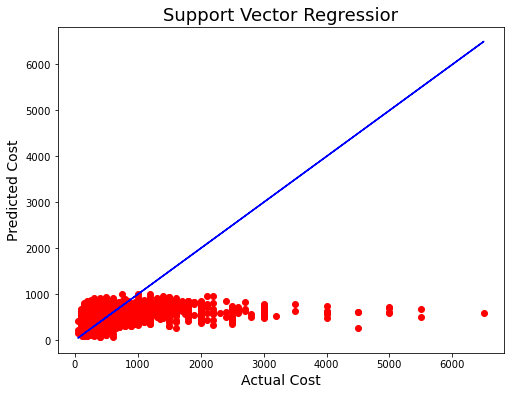

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_vector,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Cost',fontsize=14)
plt.ylabel('Predicted Cost',fontsize=14)
plt.title('Support Vector Regressior',fontsize=18)
plt.show()

In [114]:
import pickle
filename='AR_Project3.pkl'
pickle.dump(rf,open(filename,'wb'))

In [115]:
import numpy as np
a=np.array(y_test)
a

array([800, 500, 300, ..., 500, 500, 300], dtype=int64)

In [117]:
df_com=pd.DataFrame({"Original":a,"Predicted":pred_rd},index=range(len(a)))
df_com

,Original,Predicted
0,800,721.666667
1,500,635.666667
2,300,288.666667
3,600,412.333333
4,300,399.500000
...,...,...
2528,200,287.333333
2529,2100,1598.166667
2530,500,395.166667
2531,500,482.666667
